<blockquote>
    <h1>Exercise 4.11</h1>
    <p>In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the <code>Auto</code> data set.</p>
    <ol>
        <li>Create a binary variable, $\mathrm{mpg01}$, that contains a $1$ if $\mathrm{mpg}$ contains a value above its median, and a $0$ if $\mathrm{mpg}$ contains a value below its median. You can compute the median using the <code>median()</code> function. Note you may find it helpful to use the <code>data.frame()</code> function to create a single data set containing both $\mathrm{mpg01}$ and the other <code>Auto</code> variables.</li>
        <li>Explore the data graphically in order to investigate the association between $\mathrm{mpg01}$ and the other features. Which of the other features seem most likely to be useful in predicting $\mathrm{mpg01}$? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.</li>
        <li>Split the data into a training set and a test set.</li>
        <li>Perform LDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</li>
        <li>Perform QDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</li>
        <li>Perform logistic regression on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</li>
        <li>Perform KNN on the training data, with several values of $K$, in order to predict $\mathrm{mpg01}$. Use only the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?</li>        
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

<h2>Data Exploration</h2>
<p>We first read the comma-separated values (csv) <code>Auto</code> file into a pandas DataFrame, for which we will show the top five rows.</p>

In [2]:
df = pd.read_csv("../../DataSets/Auto/Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<p>We know from our <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a> for the <code>Auto</code> file that <code>horsepower</code> column contains $5$ missing values identified by the <code>'?'</code> string.</p>

In [3]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


<p>As explained in the <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a>, we will <i>coercively</i> convert the <code>horsepower</code> column from an <code>object</code> type to a <code>numeric</code> type using pandas <code>to_numeric()</code> method. This will cause all the <code>'?'</code> strings to be converted to <code>NaN</code> values. Finally, we will use the <code>dropna()</code> method to remove the rows with missing values.</p>

In [4]:
df.set_index('name', inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Exercise 4.11.1</h3>
<blockquote>
    <i>Create a binary variable, $\mathrm{mpg01}$, that contains a $1$ if $\mathrm{mpg}$ contains a value above its median, and a $0$ if $\mathrm{mpg}$ contains a value below its median. You can compute the median using the <code>median()</code> function. Note you may find it helpful to use the <code>data.frame()</code> function to create a single data set containing both $\mathrm{mpg01}$ and the other <code>Auto</code> variables.</i>
</blockquote>

In [5]:
median_mpg = df['mpg'].median()
df['mpg01'] = np.where(df['mpg'] > median_mpg, 1, 0)

<h3>Exercise 4.11.2</h3>
<blockquote>
    <i>Explore the data graphically in order to investigate the association between $\mathrm{mpg01}$ and the other features. Which of the other features seem most likely to be useful in predicting $\mathrm{mpg01}$? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.</i>
</blockquote>

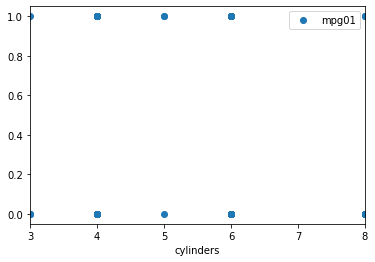

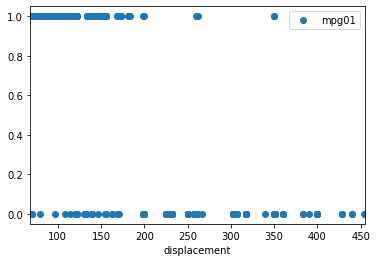

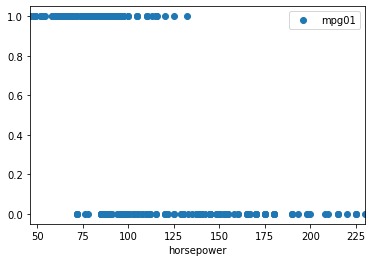

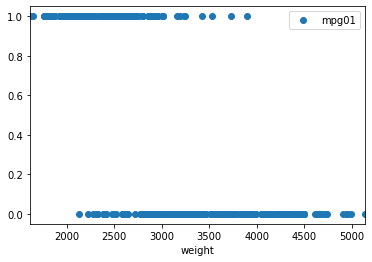

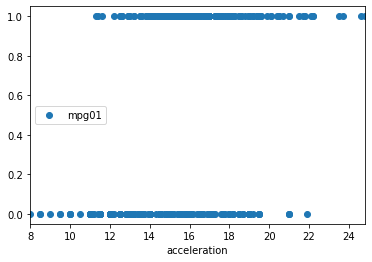

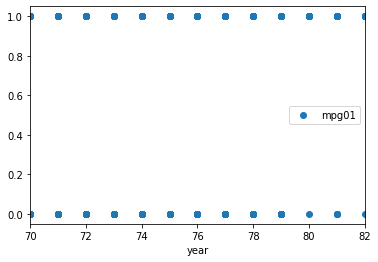

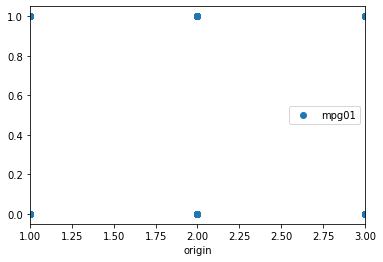

In [6]:
for column in df.columns:
    if column == 'mpg' or column == 'mpg01':
        continue
    
    _ = df.plot(x=column, y='mpg01', style='o')

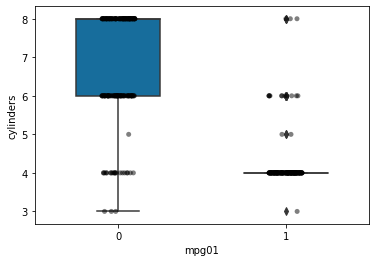

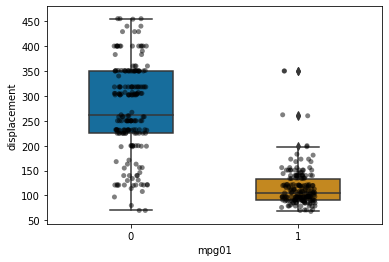

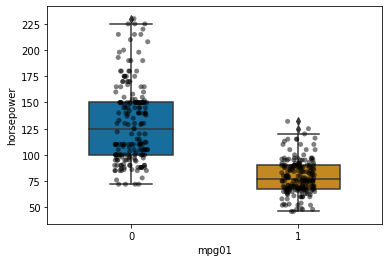

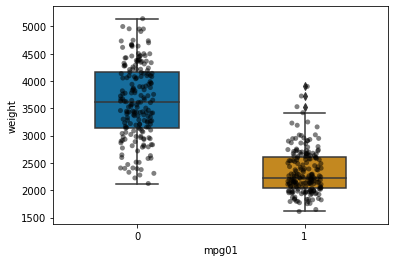

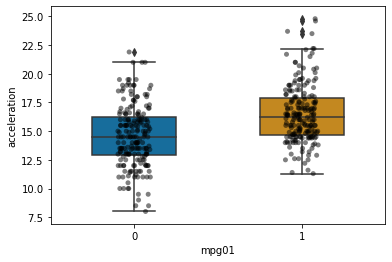

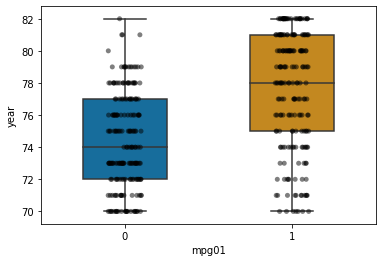

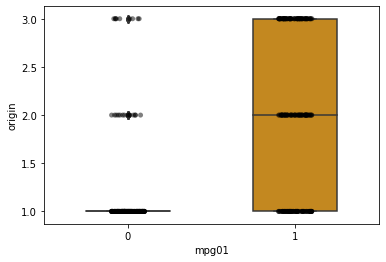

In [7]:
for index, column in enumerate(df.columns):
    if column == 'mpg' or column == 'mpg01':
        continue
        
    _ = plt.figure(index)
    # http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/
    # make boxplot with Seaborn
    _ = sns.boxplot(y=column, x='mpg01', data=df, width=0.5, palette="colorblind")
    # add stripplot to boxplot with Seaborn
    _ = sns.stripplot(y=column, x='mpg01', data=df, jitter=True, marker='o', 
                          alpha=0.5, color='black')

<p>From the boxplots it appears that the $\mathrm{horsepower}$, $\mathrm{weight}$, $\mathrm{acceleration}$, $\mathrm{displacement}$ and $\mathrm{year}$ variables could be useful in predicting $\mathrm{mpg01}$.
    
<h3>Exercise 4.11.3</h3>
<blockquote>
    <i>Split the data into a training set and a test set.</i>
</blockquote>

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((313, 9), (79, 9))

<h3>Exercise 4.11.4</h3>
<blockquote>
    <i>Perform LDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</i>
</blockquote>

In [9]:
targetColumn = ['mpg01']
descriptiveColumns = ['horsepower', 'weight', 'acceleration', 'displacement', 'year']
X_train = df_train[descriptiveColumns].to_numpy()
Y_train = np.squeeze(df_train[targetColumn].to_numpy())
X_test = df_test[descriptiveColumns].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_test['mpg01'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted                    
                             less than median greater than median
Observed less than median                  32                  10
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               76.19               23.81
             greater than median             0.00              100.00

'The classification accuracy is 87.34%.'

<h3>Exercise 4.11.5</h3>
<blockquote>
    <i>Perform QDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</i>
</blockquote>

In [10]:
model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_test['mpg01'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted                    
                             less than median greater than median
Observed less than median                  34                   8
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               80.95               19.05
             greater than median             2.70               97.30

'The classification accuracy is 88.61%.'

<h3>Exercise 4.11.6</h3>
<blockquote>
    <i>Perform logistic regression on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</i>
</blockquote>

In [11]:
df_train.insert(0, 'Intercept', 1)
df_test.insert(0, 'Intercept', 1)
descriptiveColumns = ['Intercept', 'horsepower', 'weight', 'acceleration', 'displacement', 'year']
df_X_train = df_train[descriptiveColumns]
df_Y_train = df_train[targetColumn]
df_X_test = df_test[descriptiveColumns]
df_Y_test = df_test[targetColumn]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['mpg01'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Optimization terminated successfully.
         Current function value: 0.191273
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  313
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:                  0.7240
Time:                        14:47:09   Log-Likelihood:                -59.869
converged:                       True   LL-Null:                       -216.92
Covariance Type:            nonrobust   LLR p-value:                 9.334e-66
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.4637      6.543     -2.975      0.003     -32.288      -6.639
horsepower      -0.0351      0.027     -1.301      0.193      -0.088       0.018
weight          -0.0045      0.001     -3.491      0.000      -0.007      -0.002
acceleration     0.0222      0.162      0.137      0.891      -0.295       0.340
displacement    -0.0026      0.007     -0.355      0.722      -0.017       0.012
year             0.4711      0.090      5.259      0.000       0.296       0.647
================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Predicted                    
                             less than median greater than median
Observed less than median                  34                   8
         greater than median                2                  35

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               80.95               19.05
             greater than median             5.41               94.59

'The classification accuracy is 87.34%.'

<h3>Exercise 4.11.7</h3>
<blockquote>
    <i>Perform KNN on the training data, with several values of $K$, in order to predict $\mathrm{mpg01}$. Use only the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?</i>
</blockquote>


In [12]:
for n_neighbors in range(1, 31, 1):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    _ = model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    df_Y_test_and_pred = pd.DataFrame({
        'Observed': df_test['mpg01'],
        'Predicted': Y_pred,
    })
    df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
    df_confusion  
    df_confusion_pct.round(2)

    confusion_matrix = df_confusion.to_numpy()
    TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
    class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
    f'The classification accuracy of {n_neighbors}-nearest neighbours is {class_acc:.2f}%.'
    '---'

Predicted                    
                             less than median greater than median
Observed less than median                  34                   8
         greater than median                5                  32

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               80.95               19.05
             greater than median            13.51               86.49

'The classification accuracy of 1-nearest neighbours is 83.54%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  37                   5
         greater than median                6                  31

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               88.10               11.90
             greater than median            16.22               83.78

'The classification accuracy of 2-nearest neighbours is 86.08%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  36                   6
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               85.71               14.29
             greater than median             0.00              100.00

'The classification accuracy of 3-nearest neighbours is 92.41%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  37                   5
         greater than median                4                  33

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               88.10               11.90
             greater than median            10.81               89.19

'The classification accuracy of 4-nearest neighbours is 88.61%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             0.00              100.00

'The classification accuracy of 5-nearest neighbours is 88.61%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  34                   8
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               80.95               19.05
             greater than median             0.00              100.00

'The classification accuracy of 6-nearest neighbours is 89.87%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             0.00              100.00

'The classification accuracy of 7-nearest neighbours is 88.61%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             0.00              100.00

'The classification accuracy of 8-nearest neighbours is 88.61%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  31                  11
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               73.81               26.19
             greater than median             0.00              100.00

'The classification accuracy of 9-nearest neighbours is 86.08%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             0.00              100.00

'The classification accuracy of 10-nearest neighbours is 88.61%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  30                  12
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               71.43               28.57
             greater than median             0.00              100.00

'The classification accuracy of 11-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             0.00              100.00

'The classification accuracy of 12-nearest neighbours is 88.61%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  32                  10
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               76.19               23.81
             greater than median             0.00              100.00

'The classification accuracy of 13-nearest neighbours is 87.34%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             0.00              100.00

'The classification accuracy of 14-nearest neighbours is 88.61%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  31                  11
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               73.81               26.19
             greater than median             0.00              100.00

'The classification accuracy of 15-nearest neighbours is 86.08%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  31                  11
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               73.81               26.19
             greater than median             0.00              100.00

'The classification accuracy of 16-nearest neighbours is 86.08%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  30                  12
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               71.43               28.57
             greater than median             0.00              100.00

'The classification accuracy of 17-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  30                  12
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               71.43               28.57
             greater than median             0.00              100.00

'The classification accuracy of 18-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  30                  12
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               71.43               28.57
             greater than median             0.00              100.00

'The classification accuracy of 19-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  30                  12
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               71.43               28.57
             greater than median             0.00              100.00

'The classification accuracy of 20-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  30                  12
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               71.43               28.57
             greater than median             0.00              100.00

'The classification accuracy of 21-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  31                  11
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               73.81               26.19
             greater than median             0.00              100.00

'The classification accuracy of 22-nearest neighbours is 86.08%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  30                  12
         greater than median                0                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               71.43               28.57
             greater than median             0.00              100.00

'The classification accuracy of 23-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  32                  10
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               76.19               23.81
             greater than median             2.70               97.30

'The classification accuracy of 24-nearest neighbours is 86.08%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  31                  11
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               73.81               26.19
             greater than median             2.70               97.30

'The classification accuracy of 25-nearest neighbours is 84.81%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             2.70               97.30

'The classification accuracy of 26-nearest neighbours is 87.34%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             2.70               97.30

'The classification accuracy of 27-nearest neighbours is 87.34%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             2.70               97.30

'The classification accuracy of 28-nearest neighbours is 87.34%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             2.70               97.30

'The classification accuracy of 29-nearest neighbours is 87.34%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  33                   9
         greater than median                1                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               78.57               21.43
             greater than median             2.70               97.30

'The classification accuracy of 30-nearest neighbours is 87.34%.'

'---'

<p>Thus, it seems that $K=3$ yields the best predictive model.</p>